<a href="https://colab.research.google.com/github/YounHS/Study_DataScience/blob/master/Parameter_Rawdata_Sample02_FA_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/YounHS/Big_Data_Analysis_Platform/main/data/miko/preprocess/Parameter_Rawdata_Sample02.csv?token=AJXUGYZKHD2M42CJOOPCHKTA76M3S')
del df['Unnamed: 0']
del df['시각']
del df['date']
del df['Check']
del df['Vac Pressure [V]']
del df['MO PYRO-3 [°C]']
del df['MO PYRO-2 [°C]']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216580 entries, 0 to 216579
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SV(Temp) [°C]         216580 non-null  float64
 1   CO T/C-1(PV) [°C]     216580 non-null  int64  
 2   CO T/C-2(PV) [°C]     216580 non-null  int64  
 3   CO PYRO-1(PV) [°C]    216580 non-null  float64
 4   CO PYRO-2(PV) [°C]    216580 non-null  float64
 5   MO PYRO-1 [°C]        216580 non-null  float64
 6   FELT TEMP [°C]        216580 non-null  float64
 7   Press Oil Temp. [°C]  216580 non-null  float64
 8   Main Volt (R.S) [V]   216580 non-null  float64
 9   Main Volt (S.T) [V]   216580 non-null  float64
 10  Main Volt (T.R) [V]   216580 non-null  float64
 11  Co-1 Output [%]       216580 non-null  float64
 12  Co-2 Output [%]       216580 non-null  float64
 13  Press Output [%]      216580 non-null  float64
 14  UpVolt-1 [V]          216580 non-null  float64
 15  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
!pip install factor_analyzer

     |████████████████████████████████| 40 kB 3.6 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=e1fd9ef63137f90d910ca71fd7341d30412df4f074928bc4019cb8694f3f99e9
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [12]:
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value # p_value가 0이므로 탐색적 요인분석에 적합한 데이터라고 할 수 있음

(43099296.017346956, 0.0)

In [16]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

In [14]:
kmo_all, kmo_model = calculate_kmo(df)
kmo_model # KMO 값이 0.94 이므로 우수하다고 할 수 있음

0.9368086071922274

In [17]:
fa = FactorAnalyzer(n_factors = 25, rotation = None)
fa.fit(df)

# Eigen 값 체크
ev, v = fa.get_eigenvalues()
ev

array([2.13753792e+01, 6.77557094e+00, 1.84050944e+00, 1.56224128e+00,
       4.87105214e-01, 4.17572466e-01, 2.04217800e-01, 1.47104814e-01,
       5.21216156e-02, 4.50210522e-02, 3.28647308e-02, 2.40428268e-02,
       1.30860270e-02, 9.86811832e-03, 7.71958353e-03, 2.43527196e-03,
       1.44001921e-03, 6.86464338e-04, 2.65003772e-04, 1.56481607e-04,
       1.04642195e-04, 9.27680200e-05, 7.97771790e-05, 7.56015577e-05,
       5.85519758e-05, 5.06517238e-05, 3.98285294e-05, 2.78020023e-05,
       2.49330541e-05, 1.80938216e-05, 9.42372034e-06, 8.43821578e-06,
       1.14877995e-06])

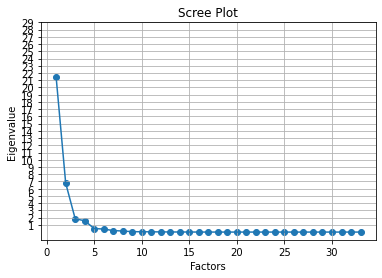

In [18]:
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.yticks(np.arange(1, 30))
plt.show()

In [19]:
fa = FactorAnalyzer(n_factors = 4, rotation="varimax") # m1 : 최대우도 방법
fa.fit(df)
efa_result = pd.DataFrame(fa.loadings_, index = df.columns)
efa_result

,0,1,2,3
SV(Temp) [°C],0.800413,0.444225,0.356428,0.084156
CO T/C-1(PV) [°C],-0.029222,-0.220935,-0.099014,-0.972554
CO T/C-2(PV) [°C],-0.165054,-0.326145,-0.166659,-0.883957
CO PYRO-1(PV) [°C],0.574224,0.675228,0.411492,0.101203
CO PYRO-2(PV) [°C],0.569943,0.679756,0.409768,0.091360
MO PYRO-1 [°C],0.574934,0.678336,0.409020,0.084826
FELT TEMP [°C],0.445659,0.765388,0.394542,-0.113315
Press Oil Temp. [°C],0.400150,0.741891,0.396966,0.167760
Main Volt (R.S) [V],-0.029025,0.885120,0.132327,0.244461
Main Volt (S.T) [V],-0.009427,0.868307,0.160583,0.248971


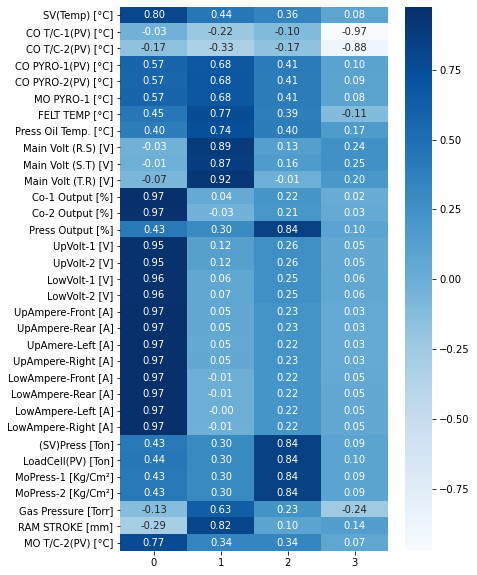

In [20]:
plt.figure(figsize=(6, 10))
sns.heatmap(efa_result, cmap = "Blues", annot = True, fmt = '.2f')

In [21]:
fa = FactorAnalyzer(n_factors = 3, rotation = "varimax") # m1 : 최대우도 방법
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [22]:
fa.get_factor_variance()

df1 = pd.DataFrame(fa.get_factor_variance())

# 행, 열 이름 설정
df1.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
df1

,0,1,2
SS Loadings,16.650865,7.277582,5.663834
Proportion Var,0.504572,0.220533,0.171631
Cumulative Var,0.504572,0.725104,0.896736


In [27]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis = 0, ddof = 1)
    tscores = itemscores.sum(axis = 1)
    nitems = itemscores.shape[1]
    
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [28]:
factors_dict = {
    'A' : ['SV(Temp) [°C]', 'Co-1 Output [%]', 'Co-2 Output [%]', 'UpVolt-1 [V]', 'UpVolt-2 [V]', 'LowVolt-1 [V]', 
           'LowVolt-2 [V]', 'UpAmpere-Front [A]', 'UpAmpere-Rear [A]', 'UpAmere-Left [A]', 'UpAmpere-Right [A]', 
           'LowAmpere-Front [A]', 'LowAmpere-Rear [A]', 'LowAmpere-Left [A]', 'LowAmpere-Right [A]', 'MO T/C-2(PV) [°C]'],
    'B' : ['CO PYRO-1(PV) [°C]', 'CO PYRO-2(PV) [°C]', 'MO PYRO-1 [°C]', 'FELT TEMP [°C]', 'Press Oil Temp. [°C]', 
           'Main Volt (R.S) [V]', 'Main Volt (S.T) [V]', 'Main Volt (T.R) [V]'],
    'C' : ['Press Output [%]', '(SV)Press [Ton]', 'LoadCell(PV) [Ton]', 'MoPress-1 [Kg/Cm²]', 'MoPress-2 [Kg/Cm²]']
}

for key, value in factors_dict.items():
    print(key)
    print(CronbachAlpha(df[value]))
    print()

A
0.8710799810001244

B
0.817819858439747

C
0.9785062003759128



In [31]:
from sklearn.preprocessing import RobustScaler

In [29]:
def robust_transform(x1, x2, x2_col_name):
#     d = {'x1' : x1.values.tolist(), 'x2' : x2.values.tolist()}
#     x = pd.DataFrame(data = d)
    
#     x_data = x['x1']
#     y_data = x['x2']
    
    x_data = pd.concat([x1, x2], axis = 1)
    y_data = x2
    
    transformer = RobustScaler()
#     transformer.fit(x_data)
    
    x_data = transformer.fit_transform(x_data)
    x_data = pd.DataFrame(x_data, columns = ['x1', 'x2'])
    
    fig, ax1 = plt.subplots(ncols = 1, figsize = (20, 5))
    
    sns.kdeplot(x_data['x1'], ax = ax1, color = 'r')
    sns.kdeplot(x_data['x2'], ax = ax1, color = 'b')
    ax1.set_title('SV(Temp) [°C] vs ' + x2_col_name)
#     plt.xlabel('SV(Temp) [°C]', fontsize = 14)
#     plt.ylabel(x2_col_name, fontsize = 14)

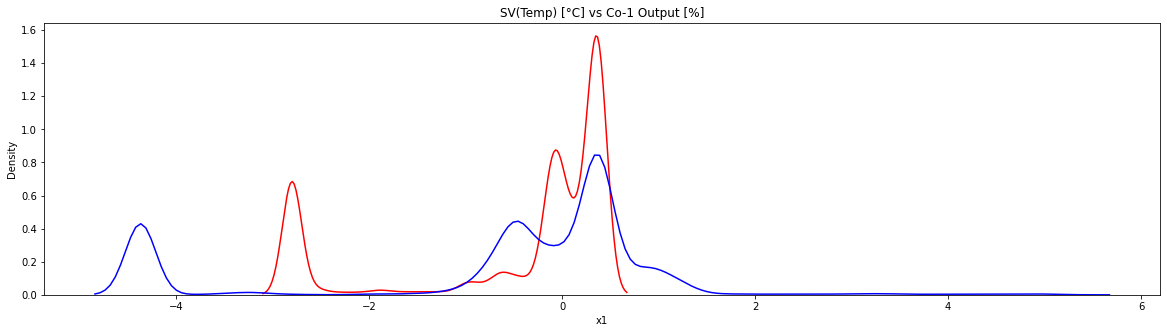

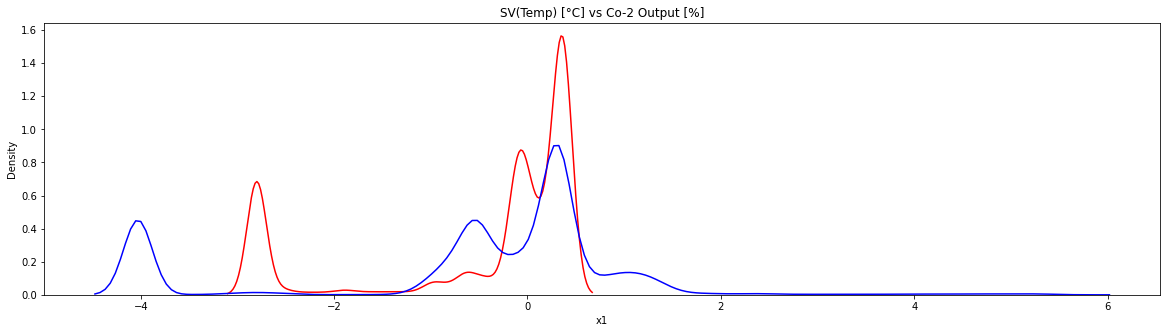

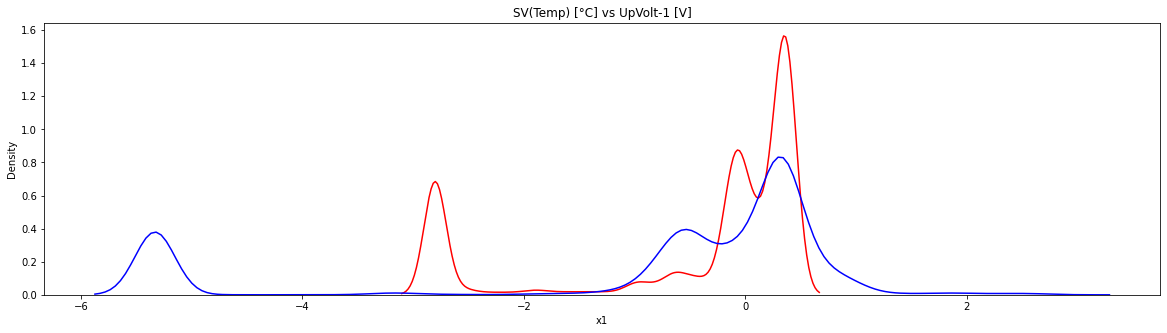

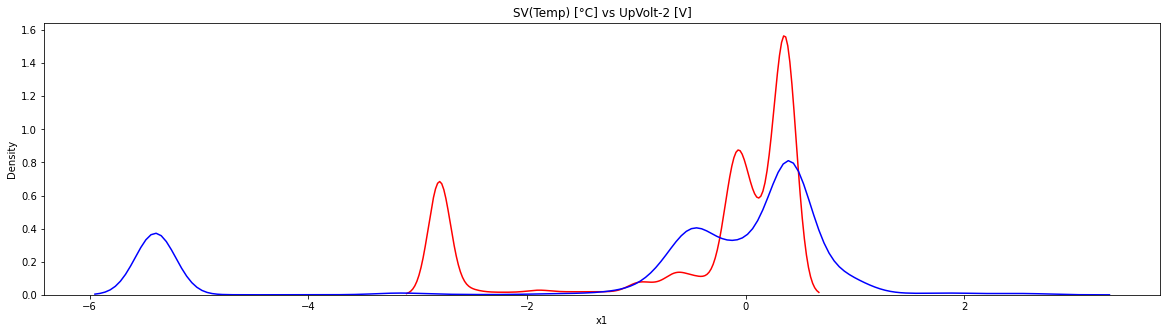

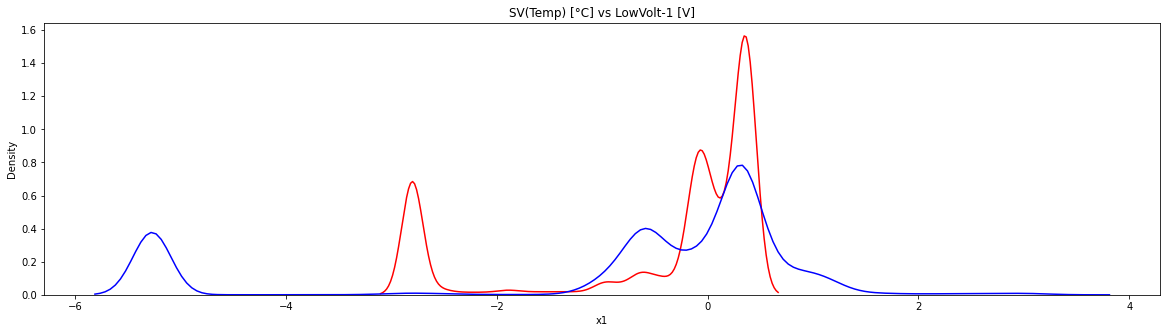

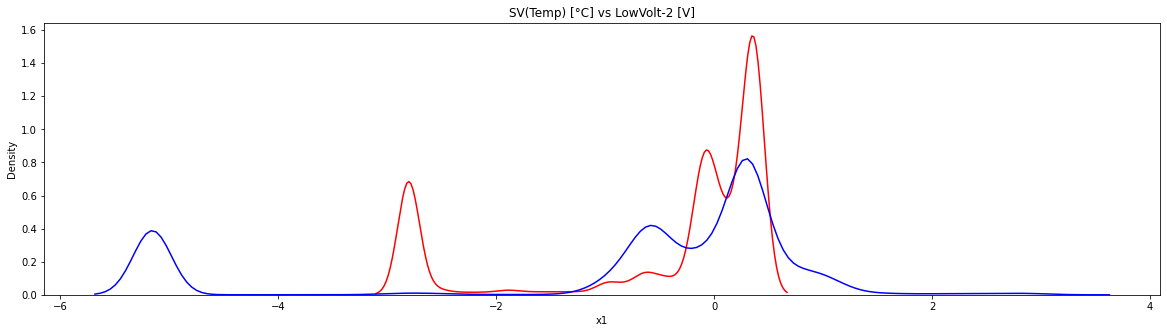

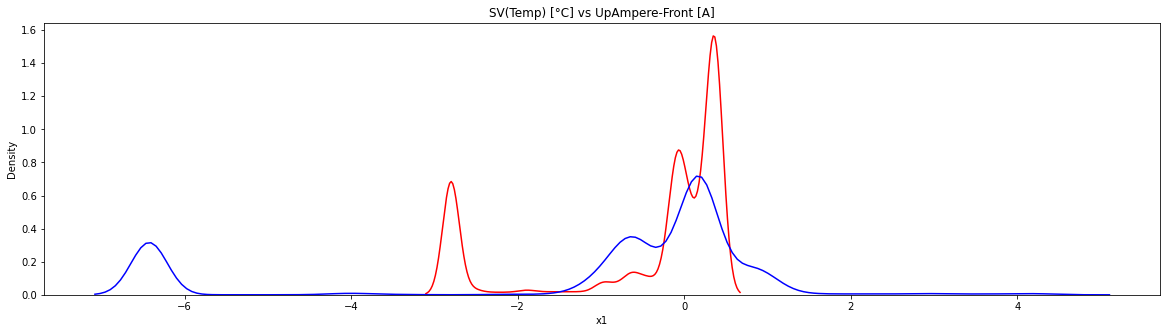

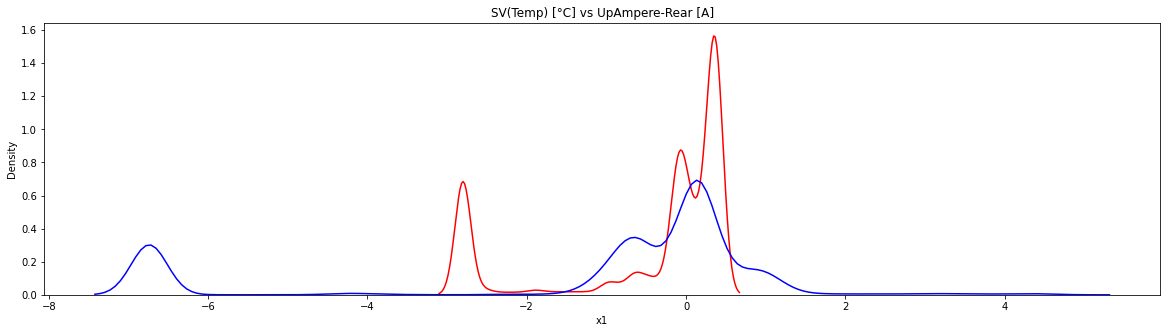

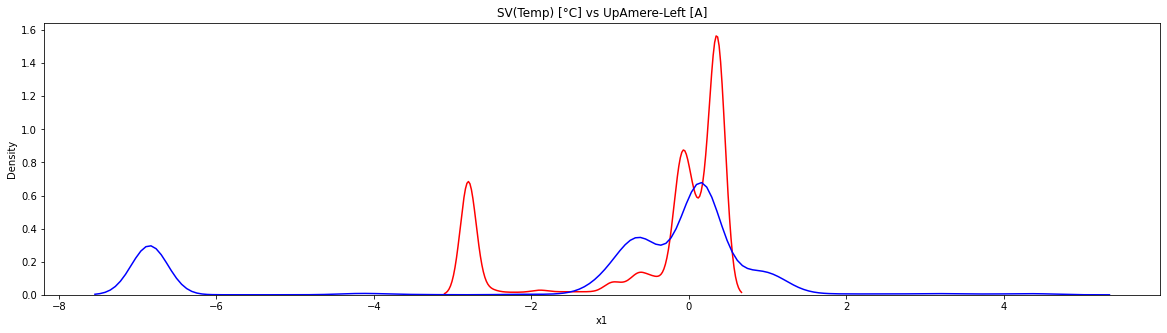

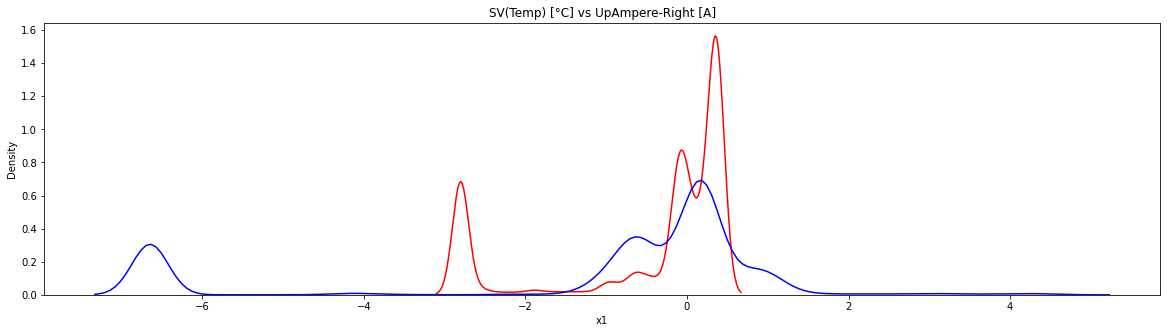

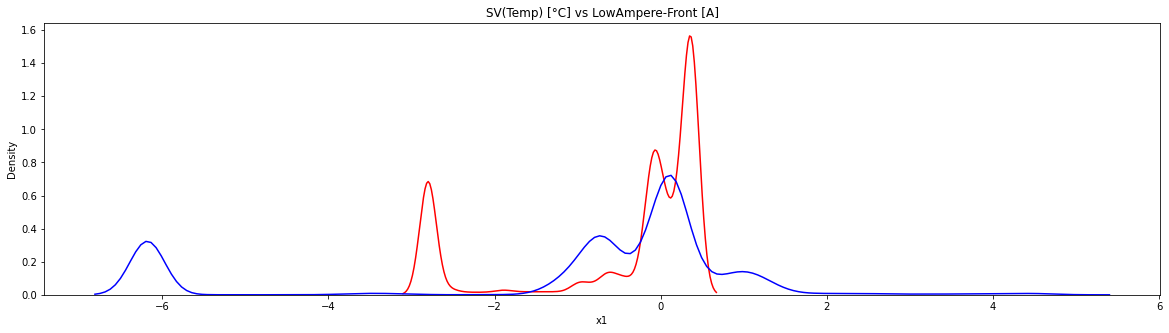

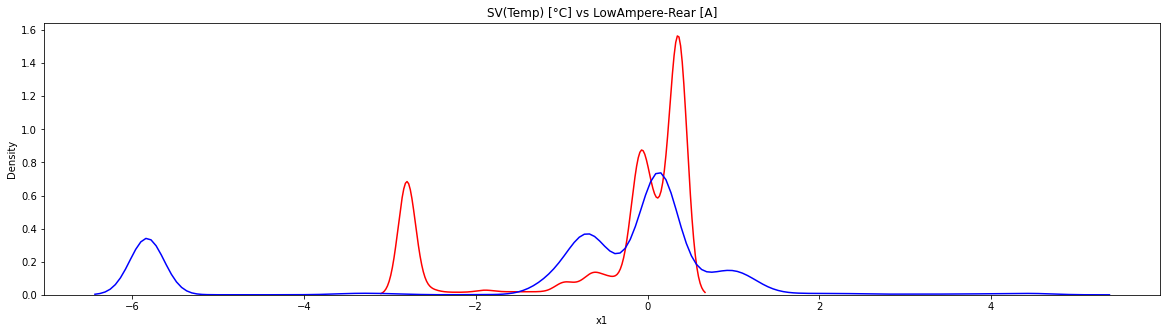

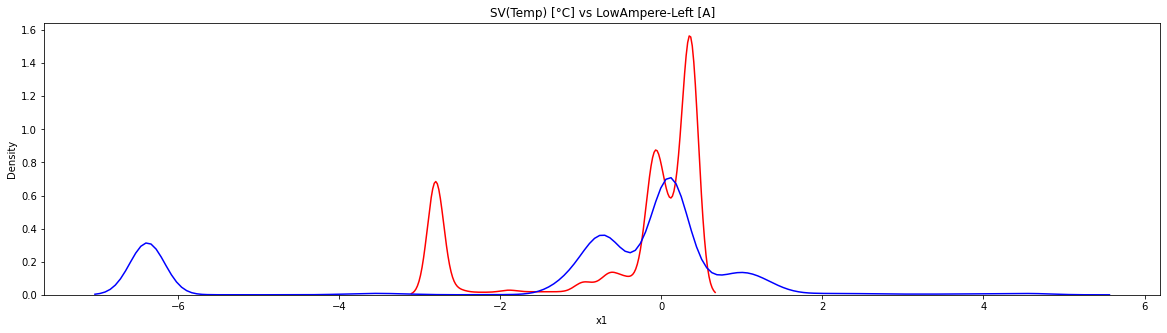

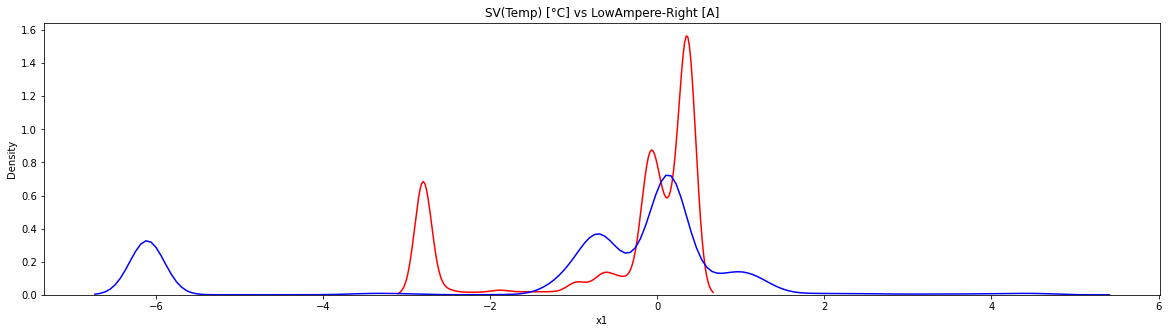

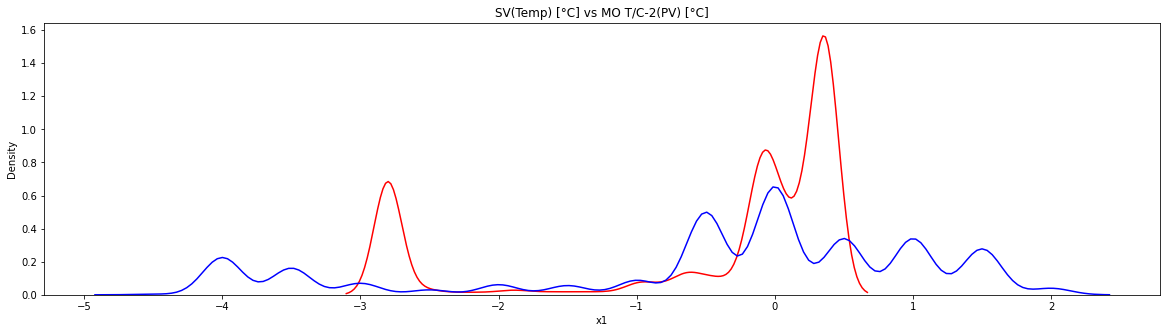

In [32]:
A_col = ['Co-1 Output [%]', 'Co-2 Output [%]', 'UpVolt-1 [V]', 'UpVolt-2 [V]', 
         'LowVolt-1 [V]', 'LowVolt-2 [V]', 'UpAmpere-Front [A]',
         'UpAmpere-Rear [A]', 'UpAmere-Left [A]', 'UpAmpere-Right [A]',
         'LowAmpere-Front [A]', 'LowAmpere-Rear [A]', 'LowAmpere-Left [A]',
         'LowAmpere-Right [A]', 'MO T/C-2(PV) [°C]']

# plt.title('Scatter Plot; A Group\'s Robust Scaling result', fontsize = 20)

for col in A_col:
    robust_transform(df['SV(Temp) [°C]'], df[col], col)
    plt.show()

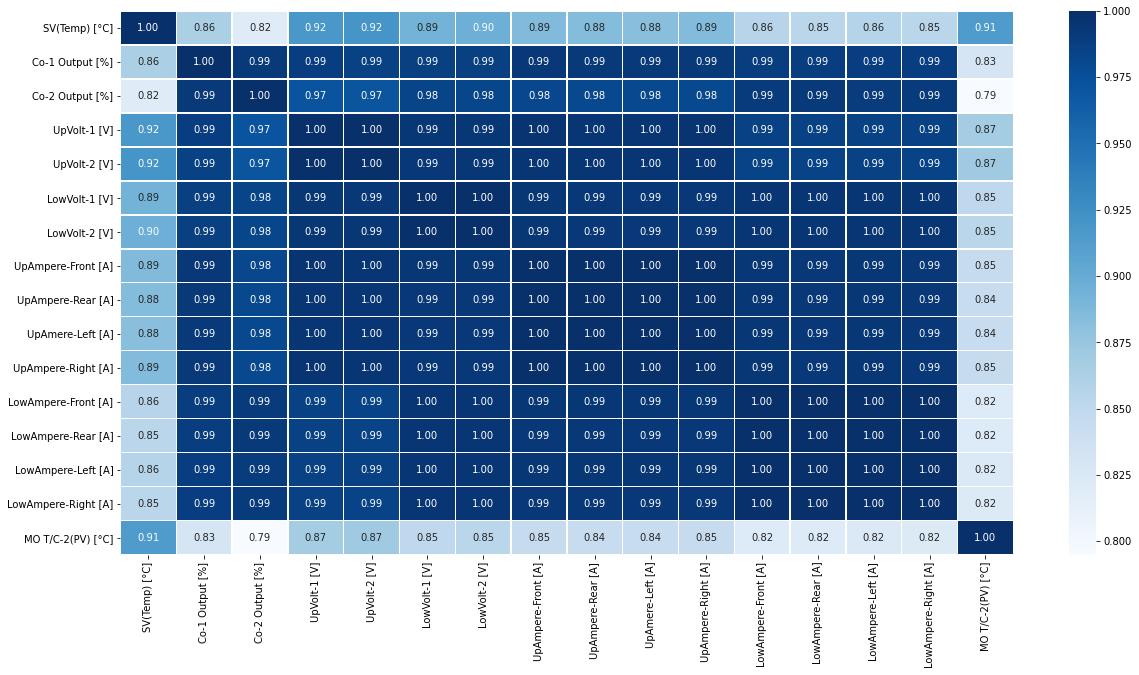

In [33]:
a_col = ['SV(Temp) [°C]', 'Co-1 Output [%]', 'Co-2 Output [%]', 'UpVolt-1 [V]',
         'UpVolt-2 [V]', 'LowVolt-1 [V]', 'LowVolt-2 [V]', 'UpAmpere-Front [A]',
         'UpAmpere-Rear [A]', 'UpAmere-Left [A]', 'UpAmpere-Right [A]',
         'LowAmpere-Front [A]', 'LowAmpere-Rear [A]', 'LowAmpere-Left [A]',
         'LowAmpere-Right [A]', 'MO T/C-2(PV) [°C]']

before_scaling = pd.DataFrame(index=range(0, 216580))

for col in a_col:
    before_scaling[col] = df[col]

plt.figure(figsize = (20, 10))
sns.heatmap(data = before_scaling.corr(), annot=True, fmt = '.2f',
            linewidths=.5, cmap='Blues')